In [58]:
#!pip3 install prettytable

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import SGDRegressor, Lasso, ElasticNet, Ridge
from sklearn.metrics import mean_squared_error

In [60]:
url = 'https://raw.githubusercontent.com/arjayit/cs4432_data/master/bike_share_hour.csv'

df = pd.read_csv(url)

In [61]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [62]:
print(df.info)

<bound method DataFrame.info of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0

In [63]:
df[['season', 'yr', 'mnth',  'holiday', 'weekday', 'workingday', 'weathersit']] = df[['season', 'yr', 'mnth',  'holiday', 'weekday', 'workingday', 'weathersit']].astype('category')

In [64]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [65]:
df.describe()


,instant,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [66]:
df.head() #Always a good idea to look at the data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [67]:
#Counts by season 
season_counts = df.groupby('season')['cnt'].sum()
season_counts

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

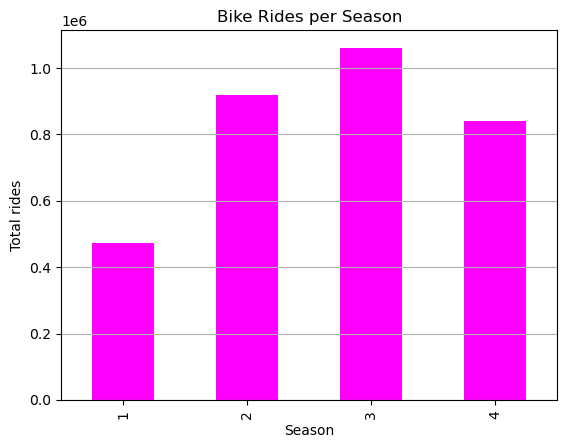

Season 3 has the most bike rides with 1061129 rides.
Season 1 has the least bike rides with 471348 rides.


In [68]:
#Create bar chart with seasons and ride counts

season_counts.plot(kind='bar', color='magenta')
plt.title('Bike Rides per Season')
plt.xlabel('Season')
plt.ylabel('Total rides')
plt.xticks()
plt.grid(axis='y')
plt.show()

max_season = season_counts.idxmax()
min_season = season_counts.idxmin()

print(f"Season {max_season} has the most bike rides with {season_counts[max_season]} rides.")
print(f"Season {min_season} has the least bike rides with {season_counts[min_season]} rides.")

In [69]:
wd = df.groupby('workingday')['cnt'].sum()
wd


workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

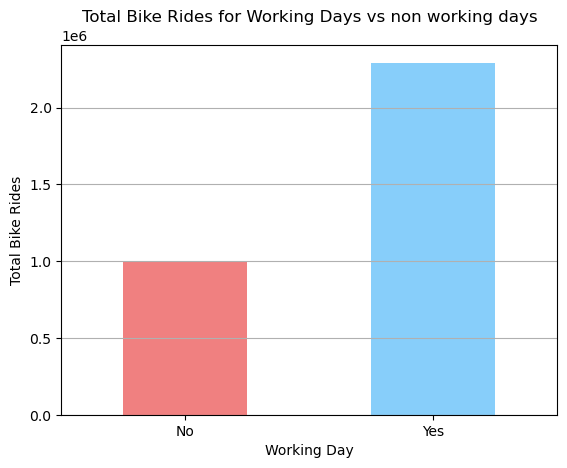

Non-work days have a total of 1000269 bike rides.
Working days have a total of 2292410 bike rides.


In [70]:
# Plot
colors = ['lightcoral', 'lightskyblue']  #choose better colors this time.
wd.plot(kind='bar', color=colors)
plt.title('Total Bike Rides for Working Days vs non working days')
plt.xlabel('Working Day')
plt.ylabel('Total Bike Rides')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.grid(axis='y')
plt.show()


non_working_day_rides = wd[0]
working_day_rides = wd[1]
print(f"Non-work days have a total of {non_working_day_rides} bike rides.")
print(f"Working days have a total of {working_day_rides} bike rides.")



In [71]:
month_counts = df.groupby('mnth')['cnt'].sum()
month_counts

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

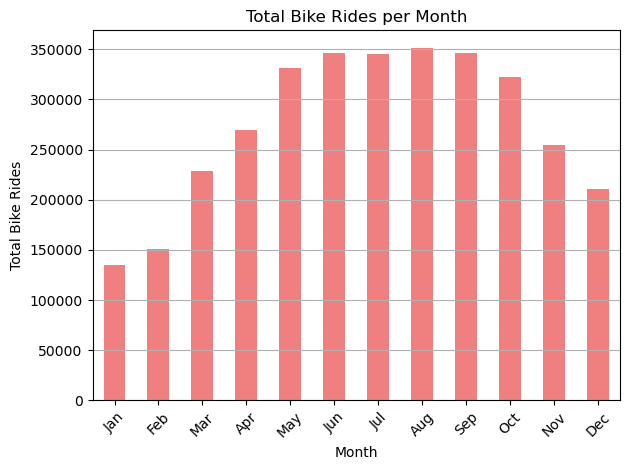

Aug has the most bike rides with 351194 rides.


In [72]:
# Plot
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts.plot(kind='bar', color='lightcoral')
plt.title('Total Bike Rides per Month')
plt.xlabel('Month')
plt.ylabel('Total Bike Rides')
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Identifying the month with most bike rides
max_month_index = month_counts.idxmax()
#max_month_index
max_month_name = month_names[max_month_index-1]
print(f"{max_month_name} has the most bike rides with {month_counts[max_month_index]} rides.")





In [73]:
# Set up a seaons dictionary
seasons_dict = {1: "Winter", 2: "Winter", 3: "Spring", 4: "Spring", 5: "Spring", 6: "Summer", 7: "Summer", 8: "Summer", 9: "Autumn/Fall",
10: "Autumn/Fall", 11: "Autumn/Fall", 12: "Winter"}

df['season_name'] = df['mnth'].map(seasons_dict)

#Check which months belong to which seasons.
months_in_seasons = df.groupby('season_name')['mnth'].unique()
#See if it works and it does 
for season, months in months_in_seasons.items():
    print(f"{season}: {', '.join(map(str, months))}")


Autumn/Fall: 9, 10, 11
Spring: 3, 4, 5
Summer: 6, 7, 8
Winter: 1, 2, 12


1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

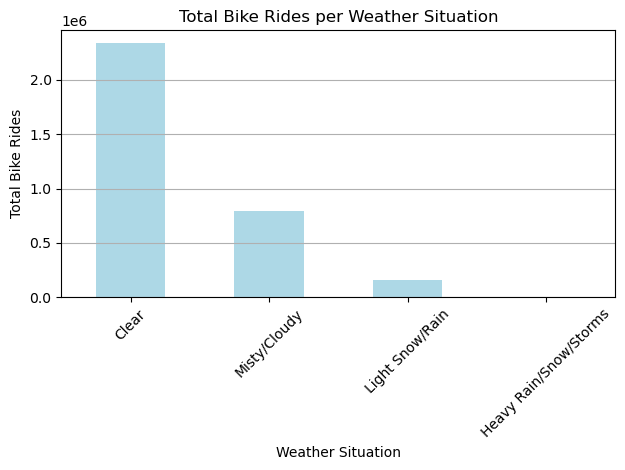

Unsurprisingly the weather situation with the least bike rentals is "Heavy Rain/Snow/Storms" with 223 rides.


In [74]:

weathersit_counts = df.groupby('weathersit')['cnt'].sum()

# Plot!
weathersit_labels = ["Clear", "Misty/Cloudy", "Light Snow/Rain", "Heavy Rain/Snow/Storms"]
weathersit_counts.plot(kind='bar', color='lightblue')
plt.title('Total Bike Rides per Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rides')
plt.xticks(ticks=range(4), labels=weathersit_labels, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Weather with least bike rides not suprising
min_weathersit_idx = weathersit_counts.idxmin()
min_weathersit_name = weathersit_labels[min_weathersit_idx - 1]
print(f"Unsurprisingly the weather situation with the least bike rentals is \"{min_weathersit_name}\" with {weathersit_counts[min_weathersit_idx]} rides.")





Object `others` not found.


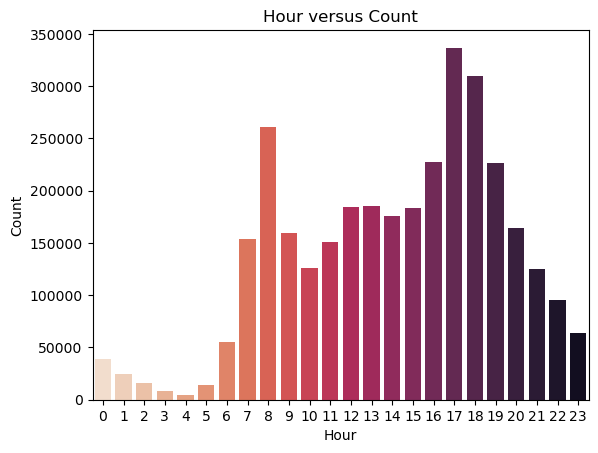

In [75]:
#Implement a bar plot of hour versus count.
are busier than others?
grouped = df.groupby('hr')['cnt'].sum().reset_index()
sns.barplot(x='hr', y='cnt', data=grouped, palette="rocket_r")

plt.title('Hour versus Count')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()



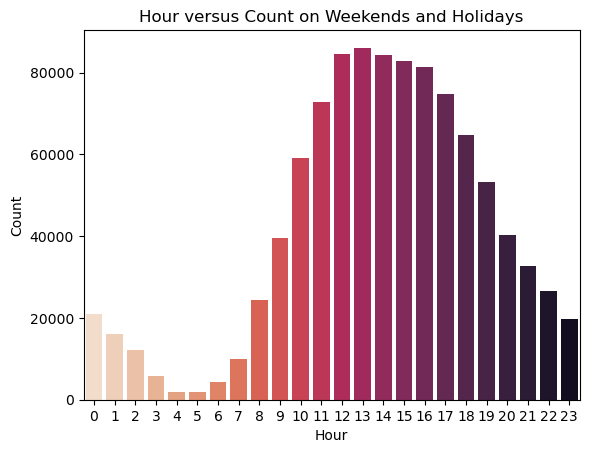

In [76]:
weekend_data = df[df['workingday'] == 0]

# Group by 'hr' and sum 'cnt'
grouped = weekend_data.groupby('hr')['cnt'].sum().reset_index()

# Use Seaborn's barplot to visualize the data
sns.barplot(x='hr', y='cnt', data=grouped, palette="rocket_r")

plt.title('Hour versus Count on Weekends and Holidays')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

### During the weekends the peak time is usually the middle of the day. During the weekdays peak time are the morning and evening hours typically associated with commuting. This is expected. 

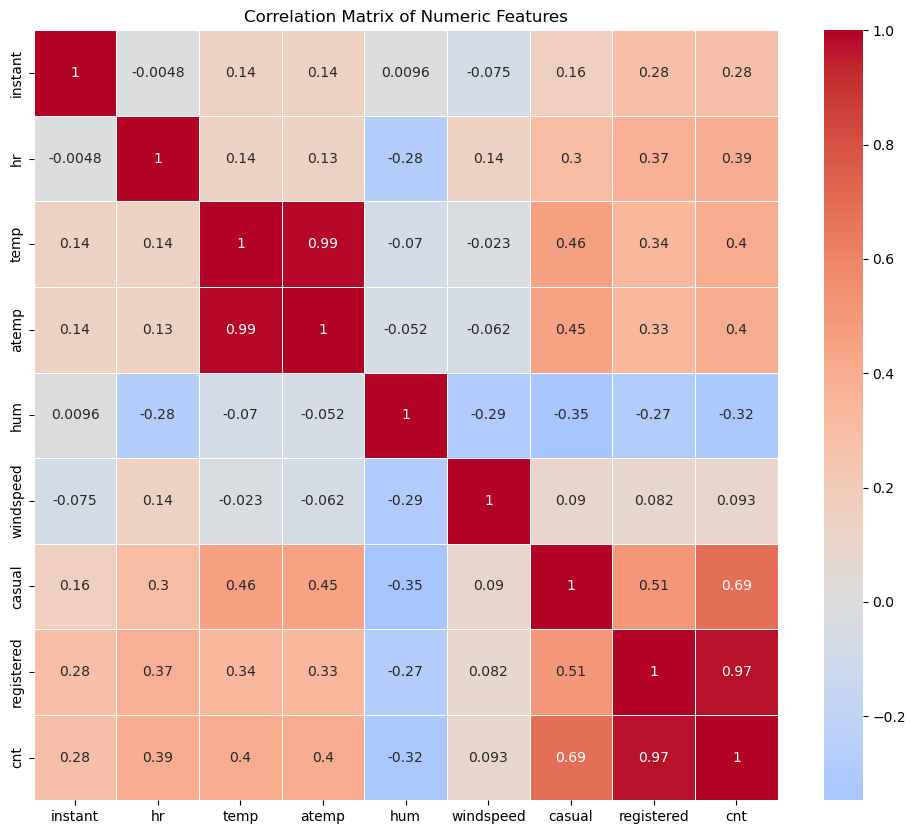

In [77]:
# Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships

numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [78]:
print(corr)

             instant        hr      temp     atemp       hum  windspeed  \
instant     1.000000 -0.004775  0.136178  0.137615  0.009577  -0.074505   
hr         -0.004775  1.000000  0.137603  0.133750 -0.276498   0.137252   
temp        0.136178  0.137603  1.000000  0.987672 -0.069881  -0.023125   
atemp       0.137615  0.133750  0.987672  1.000000 -0.051918  -0.062336   
hum         0.009577 -0.276498 -0.069881 -0.051918  1.000000  -0.290105   
windspeed  -0.074505  0.137252 -0.023125 -0.062336 -0.290105   1.000000   
casual      0.158295  0.301202  0.459616  0.454080 -0.347028   0.090287   
registered  0.282046  0.374141  0.335361  0.332559 -0.273933   0.082321   
cnt         0.278379  0.394071  0.404772  0.400929 -0.322911   0.093234   

              casual  registered       cnt  
instant     0.158295    0.282046  0.278379  
hr          0.301202    0.374141  0.394071  
temp        0.459616    0.335361  0.404772  
atemp       0.454080    0.332559  0.400929  
hum        -0.347028   -

The count of registered riders is highly correlated to the overall count. 

Implement and graph a correlation matrix with the remaining numeric 
features. Any interesting relationships?
• Scale the numerical features using StandardScaler(), and replace the 
original columns in your dataframe.
• Drop the following columns from your dataset: casual, registered, dteday, 
instant.
• Implement a histogram of the count column. What can be said based on 
the resulting distribution?
• Implement a train/test split with a test size of 33%

In [79]:

#Grab columns from df
columns = df.select_dtypes(include=['float64', 'int64']).columns
columns



Index(['instant', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [80]:
#Now scales those columns by passing list into Standard Scaler
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])



In [81]:

# Drop the following columns from your dataset: casual, registered, dteday, instant.
df = df.drop(columns=['casual', 'registered', 'dteday', 'instant', 'season_name', 'season'])
df.head()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,1,-1.670004,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889,-0.956339
1,0,1,-1.525374,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.824022
2,0,1,-1.380744,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.868128
3,0,1,-1.236115,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.972879
4,0,1,-1.091485,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-1.039037


 Implement a histogram of the count column. What can be said based on
the resulting distribution?

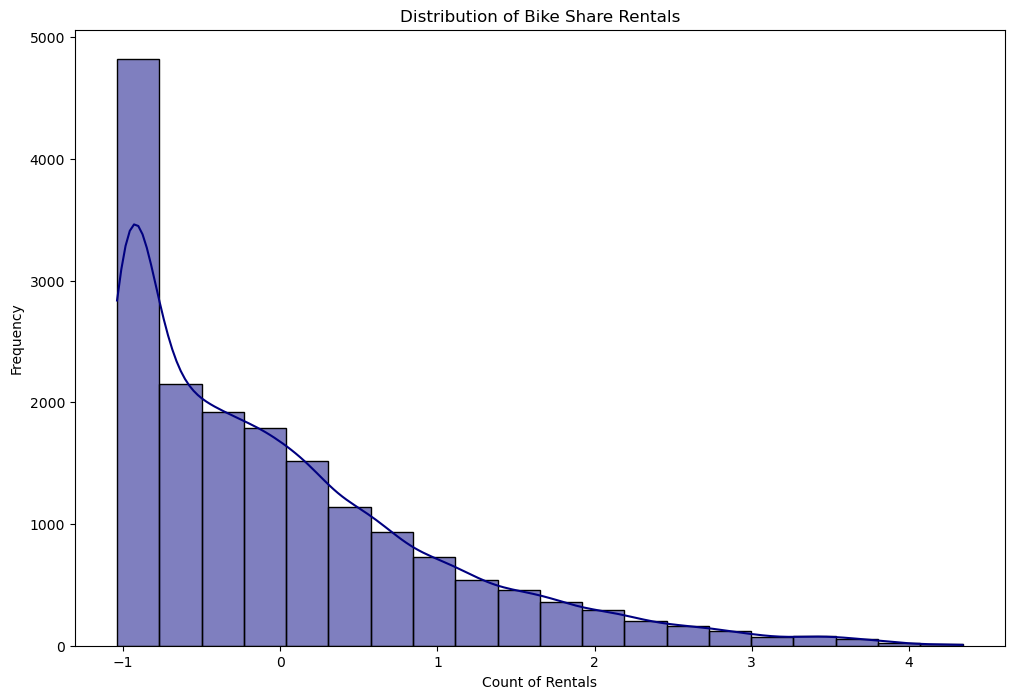

In [82]:
plt.figure(figsize=(12, 8))
sns.histplot(df['cnt'], kde=True, bins=20, color='navy')
plt.title('Distribution of Bike Share Rentals')
plt.xlabel('Count of Rentals')
plt.ylabel('Frequency')
plt.show()

In [83]:
X = df.drop(columns=['cnt'])
y = df['cnt']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55033)


In [84]:
X_train.shape[0]

11643

In [85]:

X_test.shape[0] #Looks good 

5736

Implement a baseline linear regression algorithm. Use cross-validation to 
output r2 and mse. Calculate RMSE base on mse. Document your
scores.

In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [87]:
r2_scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
mse = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error")
mse_scores = -cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(mse_scores)
print("The R2 mean is ", r2_scores.mean())
print("The MSE mean is ", mse_scores.mean())
print("The RMSE mean is ", rmse_scores.mean())


The R2 mean is  0.3865767036570261
The MSE mean is  0.621565487746312
The RMSE mean is  0.788213780718333


Part 3 


In [88]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [89]:
#Splitting encoded df up 
X = df_encoded.drop('cnt', axis=1)
y = df_encoded['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55033)

In [90]:

''' Implement and score an SGDRegressor with max_iter=1000 and
tol=1e-3).Implement and score a Lasso Regressor with alpha=0.1.
o Implement and score an ElasticNet Regressor with random_state=0.
o Implement and score a Ridge Regressor with alpha=0.5.
o Implement and score a BaggingRegressor'''

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=0)),
    ('Random Forest', RandomForestRegressor(n_estimators=30, random_state=0)),
    ('SGD Regressor', SGDRegressor(max_iter=100, tol=1e-3)),
    ('Lasso', Lasso(alpha=0.1)),
    ('ElasticNet', ElasticNet(random_state=55033)),
    ('Ridge', Ridge(alpha=0.5)),
    ('BaggingRegressor', BaggingRegressor())
]

# Train and evaluate
table = PrettyTable()
table.field_names = ["Model", "R^2", "MSE", "RMSE"]

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    table.add_row([name, f"{r2:.3f}", f"{mse:.3f}", f"{rmse:.3f}"])

print(table)


+-------------------+--------+-------+-------+
|       Model       |  R^2   |  MSE  |  RMSE |
+-------------------+--------+-------+-------+
| Linear Regression | 0.392  | 0.591 | 0.769 |
|   Decision Tree   | 0.879  | 0.118 | 0.343 |
|   Random Forest   | 0.933  | 0.065 | 0.255 |
|   SGD Regressor   | 0.391  | 0.591 | 0.769 |
|       Lasso       | 0.310  | 0.671 | 0.819 |
|     ElasticNet    | -0.000 | 0.972 | 0.986 |
|       Ridge       | 0.392  | 0.590 | 0.768 |
|  BaggingRegressor | 0.930  | 0.068 | 0.261 |
+-------------------+--------+-------+-------+


In [91]:

# Top 3 
top_models = [
    ('Decision Tree', DecisionTreeRegressor(random_state=0)),
    ('Random Forest', RandomForestRegressor(n_estimators=30, random_state=0)),
    ('BaggingRegressor', BaggingRegressor())
]

print("Cross Val Results:")

for name, model in top_models:
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)

    print(f"\nModel: {name}")
    print(f"R^2: {r2_scores.mean():}")
    print(f"MSE: {mse_scores.mean():}")
    print(f"RMSE: {rmse_scores.mean():}")


Cross Val Results:

Model: Decision Tree
R^2: 0.8680135865617402
MSE: 0.1336231078523437
RMSE: 0.36525771556250075

Model: Random Forest
R^2: 0.9283280062195949
MSE: 0.0726918918198705
RMSE: 0.2692367367636845

Model: BaggingRegressor
R^2: 0.9222940458940754
MSE: 0.07817272565585637
RMSE: 0.2792468158669061


Part 4

In [92]:

'''Your param distributions should include the following:
▪ Bootstrap: true, false
▪ Max_depth: 10-110, number of bins 11
▪ Max_features: auto, sqrt
▪ Min_samples_split: 2,5,10
▪ Min_samples_leaf: 1,2,4
▪ N_estimators: 200 – 2000, number of bins 10
'''
# Setting params RandomizedSearchCV
param_distributions = {
    'bootstrap': [True, False],
    'max_depth': [int(x) for x in np.linspace(10, 110, 11)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': np.linspace(200, 2000, 10, dtype=int)
}

# Running RandomizedSearchCV on RF
rf = RandomForestRegressor()
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=2
)

rf_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=

/Users/kurtmeyer/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
27 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kurtmeyer/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kurtmeyer/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/kurtmeyer/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constrai

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000])},
                   verbose=2)

In [93]:
best_rf = rf_search.best_estimator_

r2_scores_best = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
mse_scores_best = -cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_best = np.sqrt(mse_scores_best)

print("Best Random Forest Model from RandomizedSearchCV:")
print(f"R^2: {r2_scores_best.mean():}")
print(f"MSE: {mse_scores_best.mean():}")
print(f"RMSE: {rmse_scores_best.mean()}")

Best Random Forest Model from RandomizedSearchCV:
R^2: 0.8334368206947766
MSE: 0.17099531590563927
RMSE: 0.4132733709282076


In [94]:
final_predictions = best_rf.predict(X_test)
r2_final = best_rf.score(X_test, y_test)
mse_final = mean_squared_error(y_test, final_predictions)
rmse_final = np.sqrt(mse_final)

print("Performance on Test Set:")
print(f"R^2: {r2_final:}")
print(f"RMSE: {rmse_final:}")

Performance on Test Set:
R^2: 0.8394079004459493
RMSE: 0.3949684493997266
